[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fweberling/epistasis/blob/main/Epistasis_analysis.ipynb)






In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx
from analysis_utils import preprocessing, double_mut_pos, epistasis_graph, epistatic_triangles, comb_pos_mut, construct_structural_epistasis_graph
from plotting_utils import plot_node_degree_distribution, plot_node_degree_aa_distribution, \
    plot_mutation_distribution, plot_epistasis_model
import numpy as np
import itertools
import scipy as sp

# Wildtype Sequence

Define the wildtype sequence of the IRED

In [ ]:
# Specify sequence of reference protein
reference = "MRDTDVTVLGLGLMGQALAGAFLKDGHATTVWNRSEGKAGQLAEQGAVLASSARDAAEASPLVVVCVSDHAAVRAVLDPLGDVLAGRVLVNLTSGTSEQARATAEWAAERGITYLDGAIMAIPQVVGTADAFLLYSGPEAAYEAHEPTLRSLGAGTTYLGADHGLSSLYDVALLGIMWGTLNSFLHGAALLGTAKVEATTFAPFANRWIEAVTGFVSAYAGQVDQGAYPALDATIDTHVATVDHLIHESEAAGVNTELPRLVRTLADRALAGGQGGLGYAAMIEQFRSPS*"

# Data Pre-Processing

Define the maximum order of mutations to be analysed (e.g. double, triple, quadruple etc.) \
\
Then, the Deep Mutational Scanning (DMS) data are uploaded and pre-processed. The number of variants belonging to a certain order of mutations are printed.



In [ ]:
# Specify maximum order of mutations to be analysed i.e. mutations up to that order will be analysed
num_mut = 5

# Upload input files into panda data frame
data_frame = pd.read_csv('MePy_merge_filtered_260923.csv')

# Preprocess the data
preprocessed_data = preprocessing(data_frame, num_mut, reference)

# Lists of sequences, observed and expected fitness scores, and epistatic scores for each mutation order (e.g. 2,3,4,5)
for i in range(2, num_mut + 1):
    locals()["mut_" + str(i) + "_sequence_list"] = preprocessed_data[str(i) + " Mutation"]["Sequence of mutants"]
    locals()["mut_" + str(i) + "_W_observed_list"] = preprocessed_data[str(i) + " Mutation"]["Observed fitness"]
    locals()["mut_" + str(i) + "_W_observed_std_list"] = preprocessed_data[str(i) + " Mutation"]["Observed std of " \
                                                                                                 "fitness"]
    locals()["mut_" + str(i) + "_W_expected_list"] = preprocessed_data[str(i) + " Mutation"]["Expected fitness"]
    locals()["mut_" + str(i) + "_W_expected_std_list"] = preprocessed_data[str(i) + " Mutation"]["Expected std of " \
                                                                                                 "fitness"]
    locals()["mut_" + str(i) + "_epistatic_score_list"] = preprocessed_data[str(i) + " Mutation"]["Epistatic score"]

# Lists of sequences, observed and expected fitness scores, and epistatic scores for all mutation orders i.e. 2 - 5
full_mut_sequence_list = []
full_mut_W_observed_list = []
full_mut_W_observed_std_list = []
full_mut_W_expected_list = []
full_mut_W_expected_std_list = []
full_mut_epistatic_score_list = []

for mut_num_i in range(2, num_mut + 1):
    full_mut_sequence_list = full_mut_sequence_list + locals()["mut_" + str(mut_num_i) + "_sequence_list"]
    full_mut_W_observed_list = full_mut_W_observed_list + locals()["mut_" + str(mut_num_i) + "_W_observed_list"]
    full_mut_W_observed_std_list = full_mut_W_observed_std_list + locals()[
        "mut_" + str(mut_num_i) + "_W_observed_std_list"]
    full_mut_W_expected_list = full_mut_W_expected_list + locals()["mut_" + str(mut_num_i) + "_W_expected_list"]
    full_mut_W_expected_std_list = full_mut_W_expected_std_list + locals()[
        "mut_" + str(mut_num_i) + "_W_expected_std_list"]
    full_mut_epistatic_score_list = full_mut_epistatic_score_list + locals()[
        "mut_" + str(mut_num_i) + "_epistatic_score_list"]

# Lists of sequences, observed and expected fitness scores, and epistatic scores for all mutation orders i.e. 3 - 5
mut_3_5_sequence_list = []
mut_3_5_W_observed_list = []
mut_3_5_W_expected_list = []
mut_3_5_epistatic_score_list = []

for mut_num_i in range(3, num_mut + 1):
    mut_3_5_sequence_list = mut_3_5_sequence_list + locals()["mut_" + str(mut_num_i) + "_sequence_list"]
    mut_3_5_W_observed_list = mut_3_5_W_observed_list + locals()["mut_" + str(mut_num_i) + "_W_observed_list"]
    mut_3_5_W_expected_list = mut_3_5_W_expected_list + locals()["mut_" + str(mut_num_i) + "_W_expected_list"]
    mut_3_5_epistatic_score_list = mut_3_5_epistatic_score_list + locals()["mut_" + str(mut_num_i) +
                                                                           "_epistatic_score_list"]


number of variants with 1 analyzed: 1334
number of variants with 2 analyzed: 4235
number of variants with 3 analyzed: 2725
number of variants with 4 analyzed: 1578
number of variants with 5 analyzed: 751


# Distribution of Mutations

Plots different distributions of mutations

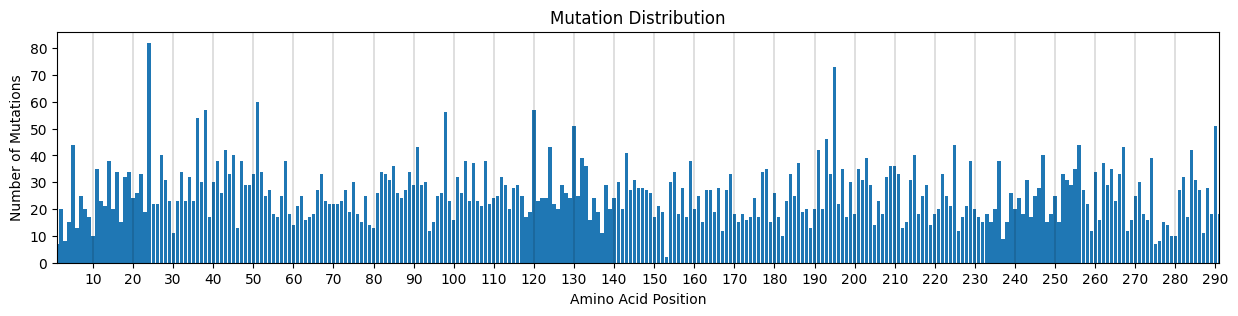

In [ ]:
# Plot mutation distribution for double mutations
plot_mutation_distribution(mut_2_sequence_list, reference)

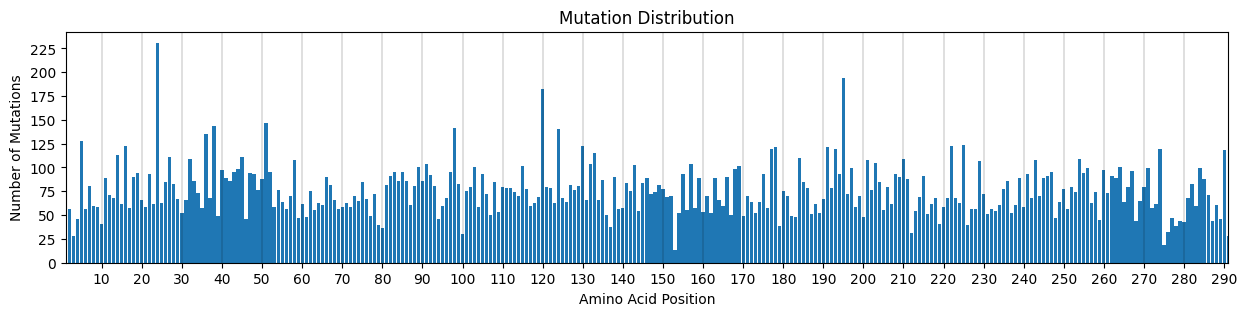

In [ ]:
# Plot mutation distribution for mutations 2 - 5
plot_mutation_distribution(full_mut_sequence_list, reference)

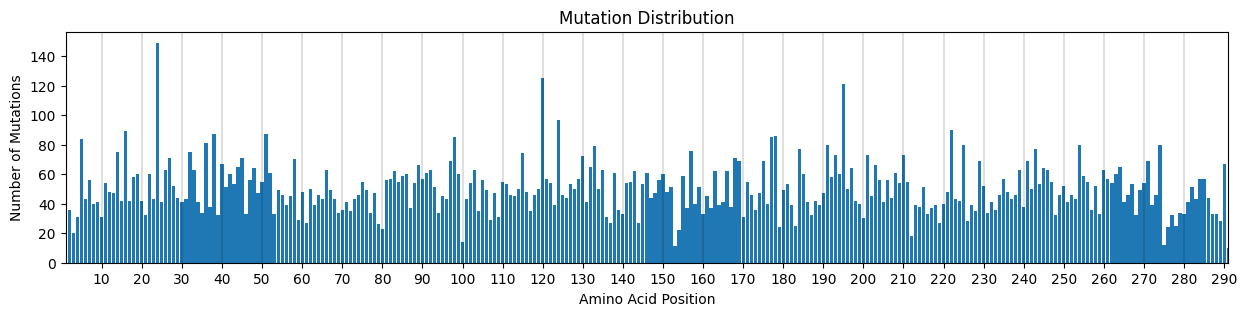

In [ ]:
# Plot mutation distribution for mutations 3 - 5
plot_mutation_distribution(mut_3_5_sequence_list, reference)

# Epistasis model

Plot the epistasis model for different orders of mutations

correlation calculated double mutations fitness / double mutation fitness: pearson r = 0.4805660721737477 with p = 1.4046795770089551e-216


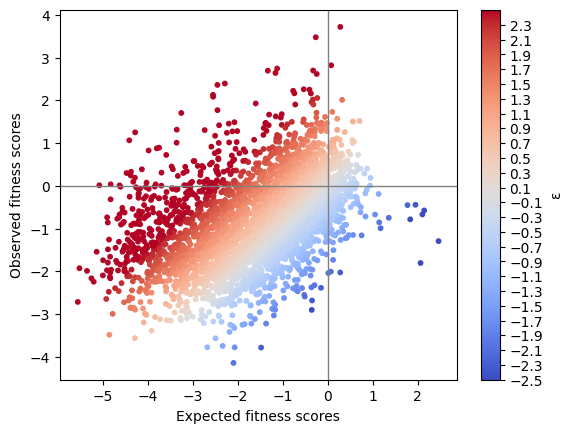

In [ ]:
# Plot epistasis model for double mutations
r_d_s, p_d_s = sp.stats.pearsonr(mut_2_W_expected_list, mut_2_W_observed_list)
print(f"correlation calculated double mutations fitness / double mutation fitness: pearson r = {r_d_s} with p = {p_d_s}")
plot_epistasis_model(mut_2_W_expected_list, mut_2_W_observed_list, mut_2_epistatic_score_list)


correlation calculated double mutations fitness / double mutation fitness: pearson r = 0.24817658588518007 with p = 3.297751117967816e-58


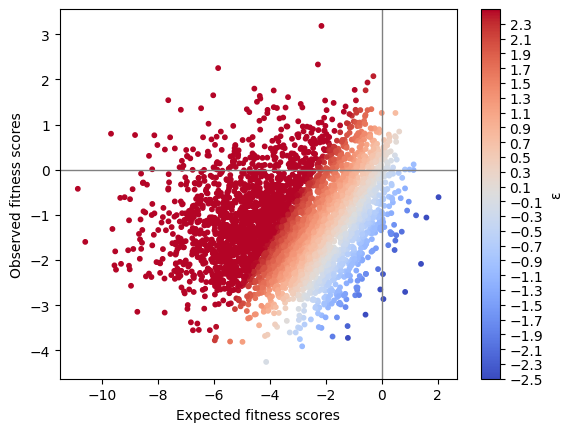

In [ ]:
# Plot epistasis model for mutations 3 - 5
r_d_s, p_d_s = sp.stats.pearsonr(mut_3_5_W_expected_list, mut_3_5_W_observed_list)
print(f"correlation calculated double mutations fitness / double mutation fitness: pearson r = {r_d_s} with p = {p_d_s}")
plot_epistasis_model(mut_3_5_W_expected_list, mut_3_5_W_observed_list, mut_3_5_epistatic_score_list)


correlation calculated double mutations fitness / double mutation fitness: pearson r = 0.37539321770049144 with p = 1.3233181516598582e-260


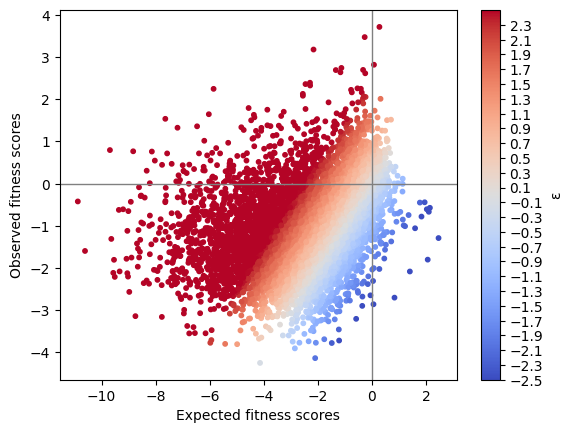

In [ ]:
# Plot epistasis model for mutations 2 - 5
r_d_s, p_d_s = sp.stats.pearsonr(full_mut_W_expected_list, full_mut_W_observed_list)
print(f"correlation calculated double mutations fitness / double mutation fitness: pearson r = {r_d_s} with p = {p_d_s}")
plot_epistasis_model(full_mut_W_expected_list, full_mut_W_observed_list, full_mut_epistatic_score_list)


# Epistasis Graphs

Given, the user defined multiples of the standard deviation of observed and expected fitness, a list of at residue positions is created which are at least double mutations.\
\
This list of is then used to construct an epistasis graph $\mathcal{G}=(V,E)$ where the set of nodes $V$ are residue positions and the set of edges $E$ positive, combinable epistatic interactions.


In [ ]:
# Multiples of standard deviation for oberserved and expected fitness
sig_stdv_obs = 1
sig_stdv_exp = 1

# List of all positive / combinable mutations
comb_pos_mut_pos_list, comb_pos_mut_aa_list = comb_pos_mut(full_mut_epistatic_score_list, full_mut_W_observed_list,
                                                           full_mut_W_expected_list, full_mut_W_observed_std_list,
                                                           full_mut_sequence_list, reference, sig_stdv_obs, sig_stdv_exp)

# Unpack list of into pairs
pos_comb_mut_edges = []
pos_comb_mut_aa = []
for higher_ord_mut in range(0, len(comb_pos_mut_pos_list)):
    higher_order_mut_list = (list(map(list, itertools.combinations(comb_pos_mut_pos_list[higher_ord_mut], 2))))
    higher_order_mut_aa_list = (list(map(list, itertools.combinations(comb_pos_mut_aa_list[higher_ord_mut], 2))))
    if len(higher_order_mut_list) == 2:
        pos_comb_mut_edges.append(higher_order_mut_list)
        pos_comb_mut_aa.append(higher_order_mut_aa_list)
    else:
        for higher_order_mut_list_ele in range(0, len(higher_order_mut_list)):
            pos_comb_mut_edges.append(higher_order_mut_list[higher_order_mut_list_ele])
            pos_comb_mut_aa.append(higher_order_mut_aa_list[higher_order_mut_list_ele])


Epistasis graph of all higher order mutants. The position of the nodes is chosen randomly and is not correlated to the structure.

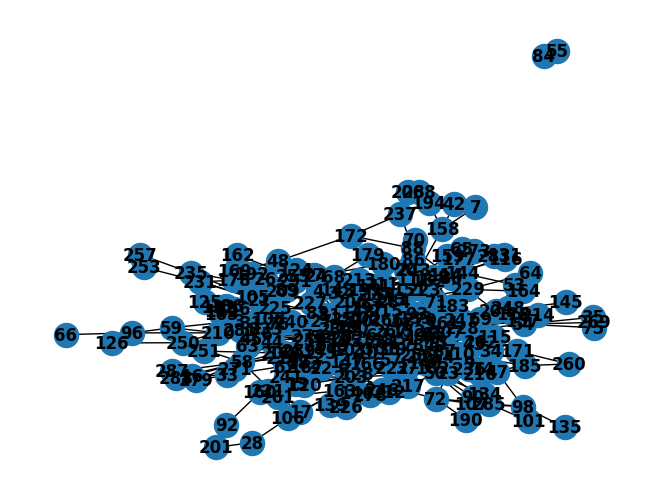

In [ ]:
# Epistasis graph for all higher order mutants
higher_order_mut_epistasis_graph = epistasis_graph(pos_comb_mut_edges)
nx.draw(higher_order_mut_epistasis_graph, with_labels=True, font_weight='bold')
plt.show()

Determine the largest cliques in the epistasis graph

In [ ]:
# Find largest cliques in largest component of graph
largest_cc = max(nx.connected_components(higher_order_mut_epistasis_graph), key=len)
higher_order_mut_epistasis_subgraph = higher_order_mut_epistasis_graph.subgraph(largest_cc)
#nx.draw(higher_order_mut_epistasis_subgraph, with_labels=True, font_weight='bold')
largest_cliques = sorted(nx.find_cliques(higher_order_mut_epistasis_subgraph), key=len, reverse=True)
print(largest_cliques)

[[21, 165, 112, 156, 76], [31, 122, 105, 186, 108], [203, 13, 120, 187, 62], [4, 32, 77, 143], [6, 128, 282, 195], [8, 166, 10, 38], [16, 33, 58, 279], [17, 106, 163, 261], [19, 129, 52, 78], [19, 37, 182, 263], [67, 230, 264, 202], [89, 192, 209, 178], [93, 290, 267, 215], [105, 231, 178, 235], [128, 212, 222, 246], [194, 268, 208, 237], [3, 27, 76], [8, 289, 168], [8, 206, 284], [9, 78, 23], [19, 110, 207], [21, 169, 48], [23, 72, 285], [25, 138, 76], [27, 82, 242], [31, 58, 250], [32, 206, 255], [36, 88, 188], [40, 43, 47], [41, 193, 130], [41, 67, 215], [41, 133, 78], [42, 194, 158], [43, 204, 87], [44, 240, 281], [45, 76, 252], [49, 266, 195], [51, 266, 205], [51, 140, 57], [52, 210, 76], [53, 164, 204], [58, 193, 218], [59, 96, 210], [65, 273, 188], [71, 152, 243], [71, 132, 207], [83, 233, 105], [85, 132, 93], [88, 172, 237], [90, 50, 134], [98, 101, 285], [102, 161, 197], [102, 166, 252], [107, 72, 190], [108, 202, 155], [110, 216, 185], [110, 138, 254], [111, 223, 215], [111, 

## Structural epistasis graph of all higher order mutants

The positions of the nodes are inferred from a distance matrix that stores the minimal distances of residues of the IRED dimer. This distance matrix is reduced to two dimensions via principal component anlaysis. These two dimensions are used as coordinates for the nodes of the epistasis graph. Thus, a node's position represents how close in protein structure it is to ther residues.

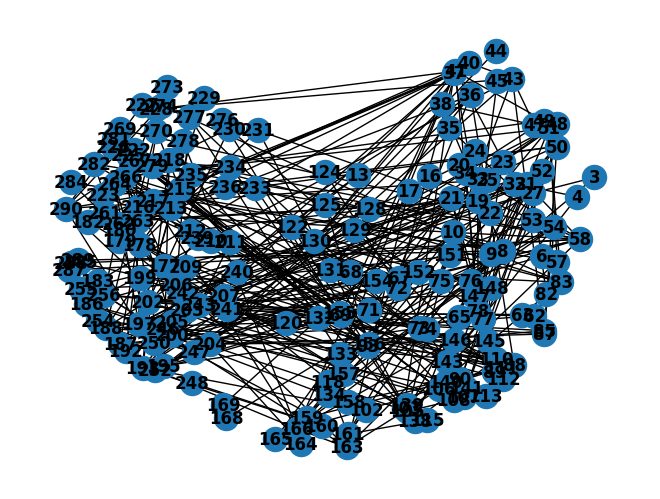

In [ ]:
# Minimal number of counts for an amino acid position to be included in the graph
minimal_count_per_node = 5

# Structural epistasis graph for all higher order mutants
dist_matrix = np.load("min_dimer_distances.npy")
structural_epistasis_graph = construct_structural_epistasis_graph(pos_comb_mut_edges, minimal_count_per_node, dist_matrix)
pos = nx.get_node_attributes(structural_epistasis_graph, 'pos')

plt.figure()
nx.draw(structural_epistasis_graph, pos, with_labels=True, font_weight='bold')
plt.show()

## Node Degree Analysis

The number of counts of epistatic interaction per amino acid position is displayed on the $y$-axis. This corresponds to the node degree of an amino acid position node in the epistasis graph. On the $x$-axis, the amino acid positions of the are given.


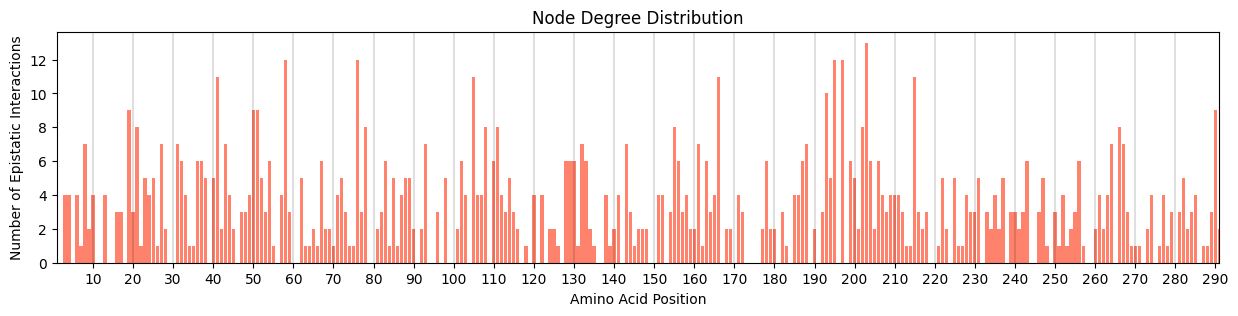

In [ ]:
# Node degree distribution in terms of counts of epistatic interactions
plot_node_degree_distribution(higher_order_mut_epistasis_graph)

The frequency of epistatic interaction per amino acid position is displayed on the $y$-axis. This corresponds to the node degree of an amino acid position node in the epistasis graph. On the $x$-axis, the amino acid positions of the are given.

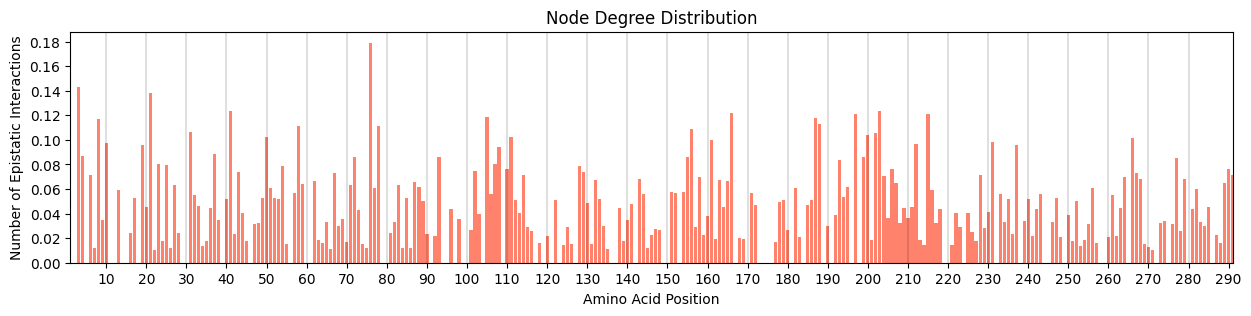

In [ ]:
# Node degree distribution in terms of frequency of epistatic interactions
plot_node_degree_distribution(higher_order_mut_epistasis_graph, frequency=True, sequences=full_mut_sequence_list,
                              reference=reference)

Plot node degree distribution with contribution of each amino acid type

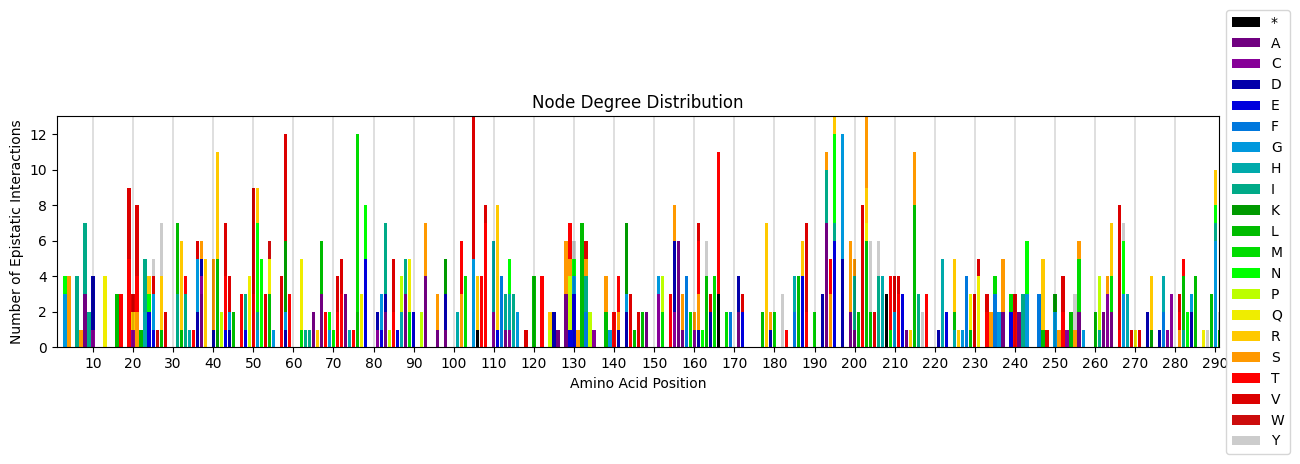

In [ ]:
# Node degree and amino acid distribution
pos_comb_higher_mut_pos = np.concatenate(
    (np.array(pos_comb_mut_edges)[:, 0], np.array(pos_comb_mut_edges)[:, 1].astype(int)), axis=0)
pos_comb_higher_mut_mut_aa = np.concatenate((np.array(pos_comb_mut_aa)[:, 0], np.array(pos_comb_mut_aa)[:, 1]), axis=0)

pos_comb_higher_mut_pos_aa = np.stack((pos_comb_higher_mut_pos, pos_comb_higher_mut_mut_aa), axis=1)

pos_per_aa_dict = plot_node_degree_aa_distribution(pos_comb_higher_mut_pos_aa)


# Analysis of Double Mutations

This is a separate analysis of double mutations. It aims to discover epistatic triangles in an epistasis graph of double mutations.

In [ ]:
# Unpack the preprocessed data
single_mut_W_observed_std = preprocessed_data["1 Mutation"]["Observed std of fitness"]
sequence_double_list = preprocessed_data["2 Mutation"]["Sequence of mutants"]
W_observed_list = preprocessed_data["2 Mutation"]["Observed fitness"]
W_observed_std_list = preprocessed_data["2 Mutation"]["Observed std of fitness"]
W_expected_list = preprocessed_data["2 Mutation"]["Expected fitness"]
W_expected_std_list = preprocessed_data["2 Mutation"]["Expected std of fitness"]
epistatic_score_list = preprocessed_data["2 Mutation"]["Epistatic score"]

Given, the user defined multiples of the standard deviation of observed and expected fitness, a list of at residue positions is created which are double mutations.\
\
This list of is then used to construct an epistasis graph $\mathcal{G}=(V,E)$ where the set of nodes $V$ are residue positions and the set of edges $E$ positive, combinable epistatic interactions.

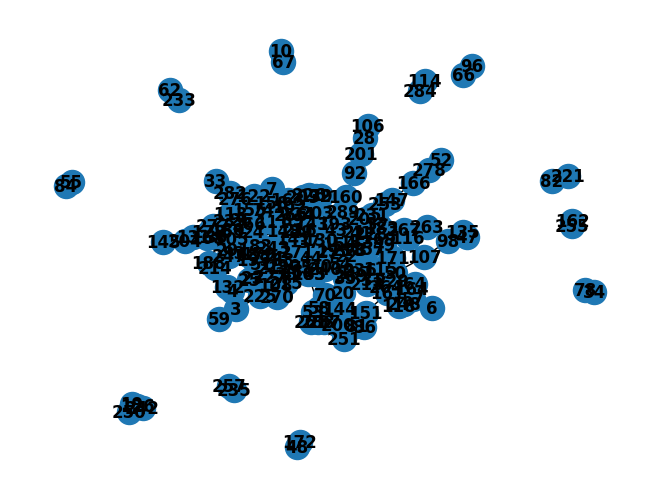

In [ ]:
sig_std_obs = 1
sig_std_exp = -1

# Create a list of positive and combinable positions of double mutations
pos_comb_double_mut_list_full = double_mut_pos(epistatic_score_list, W_observed_list, W_expected_std_list,
                                               W_observed_std_list, sequence_double_list, reference, sig_std_obs, sig_std_exp)
pos_comb_double_mut_list = pos_comb_double_mut_list_full[:, :2].astype(int)

# Create epistasis double_mut_epistasis_graph given list of double mutation positions
double_mut_epistasis_graph = epistasis_graph(pos_comb_double_mut_list)

# Plot epistasis double_mut_epistasis_graph
nx.draw(double_mut_epistasis_graph, with_labels=True, font_weight='bold')
plt.show()

The graph is analysed for triangles. These epistatic triangles give insights in combinability of double mutations

In [ ]:
# Determine all epistatic triangles for all AA positions
epistatic_triangle_list = epistatic_triangles(pos_comb_double_mut_list)
print(" Epistatic triangles: ", epistatic_triangle_list)


 Epistatic triangles:  [[41, 130, 193], [44, 240, 281]]


## Node degree distribution

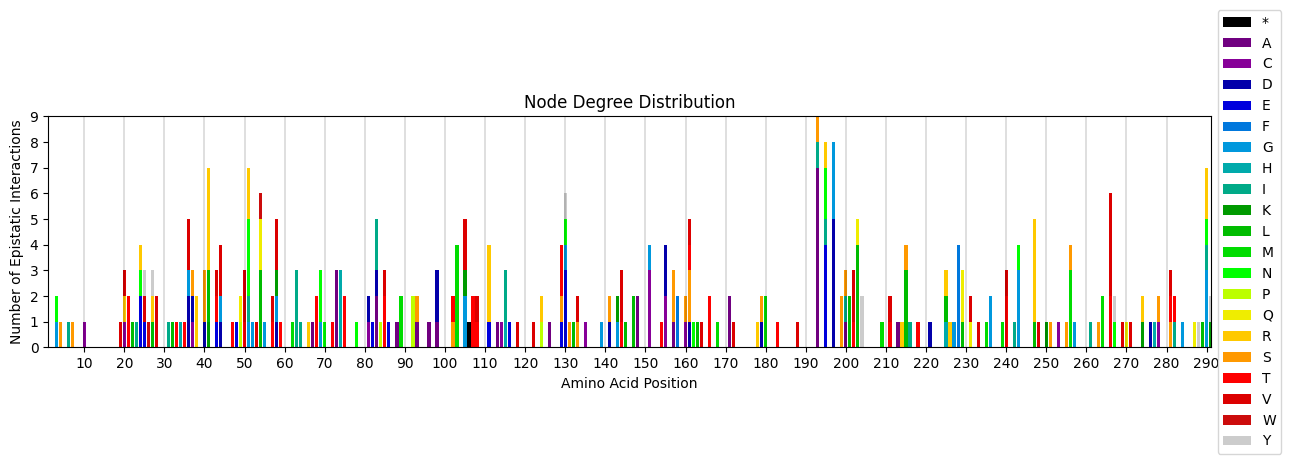

In [ ]:
# Node degree + amino acid distribution
pos_comb_double_mut_pos = np.concatenate(
    (pos_comb_double_mut_list_full[:, 0].astype(int), pos_comb_double_mut_list_full[:, 1].astype(int)), axis=0)
pos_comb_double_mut_aa = np.concatenate((pos_comb_double_mut_list_full[:, 2], pos_comb_double_mut_list_full[:, 3]),
                                        axis=0)
pos_comb_double_mut_pos_aa = np.stack((pos_comb_double_mut_pos, pos_comb_double_mut_aa), axis=1)

pos_per_aa_dict = plot_node_degree_aa_distribution(pos_comb_double_mut_pos_aa)
